In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. 기존 리포지토리 폴더로 이동
import os
os.chdir('/content/drive/MyDrive/Codeit_AI_4th_Drug_image_CV_project')

In [ ]:
# 2. 경로 확인
!pwd

/content/drive/MyDrive/Codeit_AI_4th_Drug_image_CV_project


In [ ]:
# (pull이 그냥 안될때 사용)현재 변경 사항 스태시
!git stash

No local changes to save


In [ ]:
# 3. 최신 변경사항 가져오기
!git pull origin main

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 1.18 KiB | 3.00 KiB/s, done.
From https://github.com/Dongjin-1203/Codeit_AI_4th_Drug_image_CV_project
 * branch            main       -> FETCH_HEAD
   7d556ae..d127816  main       -> origin/main
Updating 7d556ae..d127816
Fast-forward
 README.md | 4 ++++
 1 file changed, 4 insertions(+)


In [ ]:
# 3. 현재 상태 확인
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   model/notebooks/ETL_test_YOLOv8.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


# ETL 테스트용 모델(YOLOv8)
이코드는 데이터 전처리 파이프라인 모듈이 잘 생성 되었는지 알아보기 위해 테스트로 작성된 코드이다. 실제 프로젝트에 사용할 모델은 __따로 개발을 권장__ 합니다.

## 1. 데이터 준비

In [ ]:
# 데이터 구조 확인
def check_data_structure():
    required_paths = [
        './data/train_images',
        './data/test_images',
        './data/train_annotations'
    ]

    for path in required_paths:
        if os.path.exists(path):
            file_count = len(os.listdir(path))
            print(f"✅ {path}: {file_count}개 파일")
        else:
            print(f"❌ {path}: 경로 없음")

    return all(os.path.exists(path) for path in required_paths)

data_ready = check_data_structure()
print(f"\n데이터 준비 상태: {'완료' if data_ready else '미완료'}")

✅ ./data/train_images: 1489개 파일
✅ ./data/test_images: 843개 파일
✅ ./data/train_annotations: 498개 파일

데이터 준비 상태: 완료


In [ ]:
# 파이프라인 모듈 경로 추가
import sys
sys.path.append('./data_pipeline')
sys.path.append('./data_pipeline/data_preprocess')
sys.path.append('./data_pipeline/pruning_dataset')

# 파이프라인 함수 import
try:
    from data_pipeline.pipeline import (
        run_complete_pipeline,
        run_custom_pipeline,
        run_processing_pipeline_only,
        quick_prototype_pipeline
    )
    print("✅ 파이프라인 모듈 import 성공")
except ImportError as e:
    print(f"❌ Import 오류: {e}")
    print("경로를 확인하고 다시 시도해주세요")

✅ 파이프라인 모듈 import 성공


In [ ]:
# 프로토타입 테스트 (가장 빠름)
if data_ready:
    print("🚀 프로토타입 파이프라인 시작...")
    try:
        result = quick_prototype_pipeline()
        print("✅ 프로토타입 파이프라인 완료!")
        print(f"최종 패키지: {result['packaging']['archive_path']}")
        print(f"품질 점수: {result['analysis']['overall_quality_score']}")
    except Exception as e:
        print(f"❌ 실행 오류: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ 데이터가 준비되지 않았습니다. 먼저 data/ 폴더에 데이터를 배치해주세요.")

🚀 프로토타입 파이프라인 시작...
COMPLETE DATA PIPELINE STARTING

Stage 0: Creating small dataset...
Creating dataset: 50 train, 25 test -> ./data/prototype_data
Result: 50 train, 25 test, 50 annotations
Dataset created successfully at ./data/prototype_data
Small dataset created at: ./data/prototype_data

Starting full processing pipeline on: ./data/prototype_data

Stage 1: Data validation...
Dataset Validation
Validating images...
Images: 75/75 valid
Validating annotations...
Annotations: 50/50 valid

Validation Summary:
Images: 75/75 valid (100.0%)
Annotations: 50/50 valid (100.0%)

Stage 2: Image preprocessing...
Dataset Preprocessing
Preprocessing dataset: ./data/prototype_data -> ./data/prototype_data/preprocessed
Processing 50 training images...
Processing 25 test images...
Preprocessing complete: 75 processed, 0 failed

Preprocessing Summary:
Processed: 75
Failed: 0
Success rate: 100.0%

Stage 3: COCO to YOLO conversion...
COCO to YOLO Conversion
Converting COCO to YOLO: ./data/prototype_dat

In [ ]:
# # 커스텀 크기로 테스트 (원하는 크기 지정)
# def test_custom_pipeline(train_size=100, test_size=50):
#     print(f"🔧 커스텀 파이프라인 시작 (훈련:{train_size}, 테스트:{test_size})...")

#     try:
#         result = run_custom_pipeline(
#             train_size=train_size,
#             test_size=test_size,
#             output_name="colab_test",
#             strategy="balanced"
#         )

#         print("✅ 커스텀 파이프라인 완료!")
#         print(f"처리된 이미지: {result['preprocessing']['processed']}")
#         print(f"변환된 이미지: {result['conversion']['converted_count']}")
#         print(f"최종 패키지: {result['packaging']['archive_path']}")

#         return result

#     except Exception as e:
#         print(f"❌ 실행 오류: {e}")
#         import traceback
#         traceback.print_exc()
#         return None

# # 실행
# if data_ready:
#     custom_result = test_custom_pipeline(50, 25)  # 작은 크기로 테스트

In [ ]:
# 결과 폴더 확인
def check_results():
    print("📁 생성된 결과 폴더:")

    # data 폴더 하위의 생성된 폴더들 확인
    for root, dirs, files in os.walk('./data'):
        level = root.replace('./data', '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")

        # 최대 깊이 3레벨까지만 표시
        if level < 3:
            sub_indent = ' ' * 2 * (level + 1)
            for file in files[:5]:  # 최대 5개 파일만 표시
                print(f"{sub_indent}{file}")
            if len(files) > 5:
                print(f"{sub_indent}... 외 {len(files)-5}개 파일")

check_results()

📁 생성된 결과 폴더:
data/
  data_explane.txt
  train_images/
    K-003351-013900-036637_0_2_0_2_70_000_200.png
    K-003351-016232-018147_0_2_0_2_75_000_200.png
    K-003351-016232-019232_0_2_0_2_70_000_200.png
    K-003351-013900-035206_0_2_0_2_70_000_200.png
    K-003351-013900-035206_0_2_0_2_90_000_200.png
    ... 외 1484개 파일
  train_annotations/
    K-001900-016548-018110-021026_json/
      K-001900/
      K-016548/
      K-021026/
      K-018110/
    K-001900-016548-018110-029451_json/
      K-001900/
      K-016548/
      K-018110/
      K-029451/
    K-001900-016548-018110-031705_json/
      K-001900/
      K-016548/
      K-018110/
      K-031705/
    K-001900-016548-019607-021026_json/
      K-016548/
      K-001900/
      K-019607/
      K-021026/
    K-001900-010224-016551-031705_json/
      K-001900/
      K-031705/
      K-016551/
    K-001900-010224-016551-033009_json/
      K-001900/
      K-016551/
      K-033009/
    K-001900-016548-018110-027926_json/
      K-001900/
      K-

In [ ]:
# GPU 확인
import torch
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU 메모리: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f}GB")

CUDA 사용 가능: True
GPU: Tesla T4
GPU 메모리: 14.7GB


## 2. 데이터세트 생성

In [ ]:
import os
import yaml

# 생성된 데이터셋 경로 확인
dataset_paths = [
    './data/prototype_data/final_dataset',
    './data/dev_data/final_dataset',
    './data/exp_data/final_dataset',
    './data/custom_data/final_dataset'
]

available_datasets = []
for path in dataset_paths:
    if os.path.exists(path):
        available_datasets.append(path)
        print(f"✅ 데이터셋 발견: {path}")

if not available_datasets:
    print("❌ 사용 가능한 데이터셋이 없습니다. 먼저 파이프라인을 실행하세요.")
else:
    # 첫 번째 사용 가능한 데이터셋 선택
    dataset_path = available_datasets[0]
    print(f"\n사용할 데이터셋: {dataset_path}")

✅ 데이터셋 발견: ./data/prototype_data/final_dataset

사용할 데이터셋: ./data/prototype_data/final_dataset


## 3. 데이터셋 설정 확인

In [ ]:
# dataset.yaml 파일 확인
yaml_path = os.path.join(dataset_path, 'dataset.yaml')

if os.path.exists(yaml_path):
    with open(yaml_path, 'r') as f:
        dataset_config = yaml.safe_load(f)

    print("데이터셋 설정:")
    print(f"  클래스 수: {dataset_config['nc']}")
    print(f"  클래스명: {dataset_config['names'][:5]}...")  # 처음 5개만 표시
    print(f"  훈련 경로: {dataset_config['train']}")
    print(f"  검증 경로: {dataset_config['val']}")
    print(f"  테스트 경로: {dataset_config['test']}")

    # 실제 파일 수 확인
    train_images = len(os.listdir(os.path.join(dataset_path, 'images/train')))
    val_images = len(os.listdir(os.path.join(dataset_path, 'images/val')))
    test_images = len(os.listdir(os.path.join(dataset_path, 'images/test')))

    print(f"\n실제 파일 수:")
    print(f"  훈련: {train_images}개")
    print(f"  검증: {val_images}개")
    print(f"  테스트: {test_images}개")
else:
    print("❌ dataset.yaml 파일이 없습니다.")

데이터셋 설정:
  클래스 수: 50
  클래스명: ['K-001900-016548-019607-029345', 'K-001900-016548-021026-024850', 'K-001900-016551-021026-044199', 'K-001900-016551-021771-029451', 'K-001900-016551-027926-033208']...
  훈련 경로: images/train
  검증 경로: images/val
  테스트 경로: images/test

실제 파일 수:
  훈련: 39개
  검증: 3개
  테스트: 8개


## 4. 모델 생성(YOLOv8)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# YOLOv8 모델 로드 (nano 버전 - 빠른 학습용)
model = YOLO('yolov8n.pt')  # nano 모델 (가장 빠름)
# model = YOLO('yolov8s.pt')  # small 모델 (성능 향상)

print("YOLO 모델 로드 완료")
print(f"모델 정보: {model.model}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO 모델 로드 완료
모델 정보: DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, mo

## 5. 학습 설정 및 실행

In [ ]:
# 학습 설정
training_config = {
    'data': yaml_path,           # 데이터셋 설정 파일
    'epochs': 10,                # 에포크 수 (테스트용으로 작게 설정)
    'imgsz': 1280,              # 이미지 크기 (파이프라인과 일치)
    'batch': 8,                 # 배치 크기 (GPU 메모리에 따라 조정)
    'device': 0 if torch.cuda.is_available() else 'cpu',  # GPU 사용
    'project': 'result/train',    # 결과 저장 폴더
    'name': 'pill_detection',   # 실험 이름
    'save': True,               # 모델 저장
    'plots': True,              # 학습 그래프 생성
    'verbose': True             # 상세 로그 출력
}

print("학습 설정:")
for key, value in training_config.items():
    print(f"  {key}: {value}")

print(f"\n🚀 YOLO 모델 학습 시작...")
print(f"예상 소요 시간: 약 {training_config['epochs'] * 2}분")

학습 설정:
  data: ./data/prototype_data/final_dataset/dataset.yaml
  epochs: 10
  imgsz: 1280
  batch: 8
  device: 0
  project: result/train
  name: pill_detection
  save: True
  plots: True
  verbose: True

🚀 YOLO 모델 학습 시작...
예상 소요 시간: 약 20분


## 6. 학습 실행

In [ ]:
# 학습 실행
try:
    results = model.train(**training_config)
    print("✅ 학습 완료!")

    # 학습 결과 확인 (속성 탐색)
    print(f"\n학습 결과 정보:")
    print(f"  결과 타입: {type(results)}")

    # 사용 가능한 속성들 확인
    if hasattr(results, '__dict__'):
        attrs = [attr for attr in dir(results) if not attr.startswith('_')]
        print(f"  사용 가능한 속성: {attrs[:5]}...")  # 처음 5개만 표시

    # 일반적인 YOLO 결과 접근 방법
    try:
        # 최종 메트릭 정보는 보통 마지막 에포크 결과에서 확인
        print(f"\n학습 요약:")
        print(f"  총 에포크: {training_config['epochs']}")
        print(f"  사용된 배치 크기: {training_config['batch']}")
        print(f"  이미지 크기: {training_config['imgsz']}")

        # 학습이 완료되었다는 것 자체가 성공
        print(f"  상태: 학습 완료")

    except Exception as e:
        print(f"결과 정보 추출 중 오류: {e}")

except Exception as e:
    print(f"❌ 학습 중 오류 발생: {e}")
    import traceback
    traceback.print_exc()

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/prototype_data/final_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pill_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

## 7. 학습 결과 확인

In [ ]:
# 학습 결과 폴더 확인
import glob
import pandas as pd

# 가장 최근 학습 결과 폴더 찾기
train_folders = glob.glob('result/train/pill_detection*')
if train_folders:
    latest_folder = max(train_folders, key=os.path.getctime)
    print(f"학습 결과 폴더: {latest_folder}")

    # 생성된 파일들 확인
    result_files = os.listdir(latest_folder)
    print(f"\n생성된 파일들:")
    for file in result_files:
        print(f"  {file}")

    # 최종 모델 경로
    best_model_path = os.path.join(latest_folder, 'weights/best.pt')
    last_model_path = os.path.join(latest_folder, 'weights/last.pt')

    if os.path.exists(best_model_path):
        print(f"\n✅ 최고 성능 모델: {best_model_path}")
    if os.path.exists(last_model_path):
        print(f"✅ 최종 모델: {last_model_path}")

    # CSV 결과 파일에서 메트릭 읽기
    results_csv = os.path.join(latest_folder, 'results.csv')
    if os.path.exists(results_csv):
        try:
            df = pd.read_csv(results_csv)
            print(f"\n📊 학습 메트릭 (마지막 에포크):")

            # 마지막 행 (최종 결과)
            last_row = df.iloc[-1]

            # 일반적인 YOLO 메트릭들
            metrics_to_show = {
                'train/box_loss': '훈련 박스 손실',
                'train/cls_loss': '훈련 분류 손실',
                'val/box_loss': '검증 박스 손실',
                'val/cls_loss': '검증 분류 손실',
                'metrics/mAP50(B)': 'mAP50',
                'metrics/mAP50-95(B)': 'mAP50-95'
            }

            for metric, name in metrics_to_show.items():
                if metric in df.columns:
                    value = last_row[metric]
                    print(f"  {name}: {value:.3f}")

        except Exception as e:
            print(f"CSV 파일 읽기 오류: {e}")

else:
    print("❌ 학습 결과를 찾을 수 없습니다.")

학습 결과 폴더: result/train/pill_detection

생성된 파일들:
  weights
  args.yaml
  labels.jpg
  train_batch0.jpg
  train_batch1.jpg
  train_batch2.jpg
  results.csv
  BoxPR_curve.png
  val_batch0_pred.jpg
  val_batch0_labels.jpg
  BoxF1_curve.png
  BoxP_curve.png
  BoxR_curve.png
  confusion_matrix_normalized.png
  confusion_matrix.png
  results.png

✅ 최고 성능 모델: result/train/pill_detection/weights/best.pt
✅ 최종 모델: result/train/pill_detection/weights/last.pt

📊 학습 메트릭 (마지막 에포크):
  훈련 박스 손실: 0.405
  훈련 분류 손실: 8.737
  검증 박스 손실: 0.378
  검증 분류 손실: 3.826
  mAP50: 0.398
  mAP50-95: 0.365


## 8. 모델 학습 결과 시각화

📊 학습 곡선:


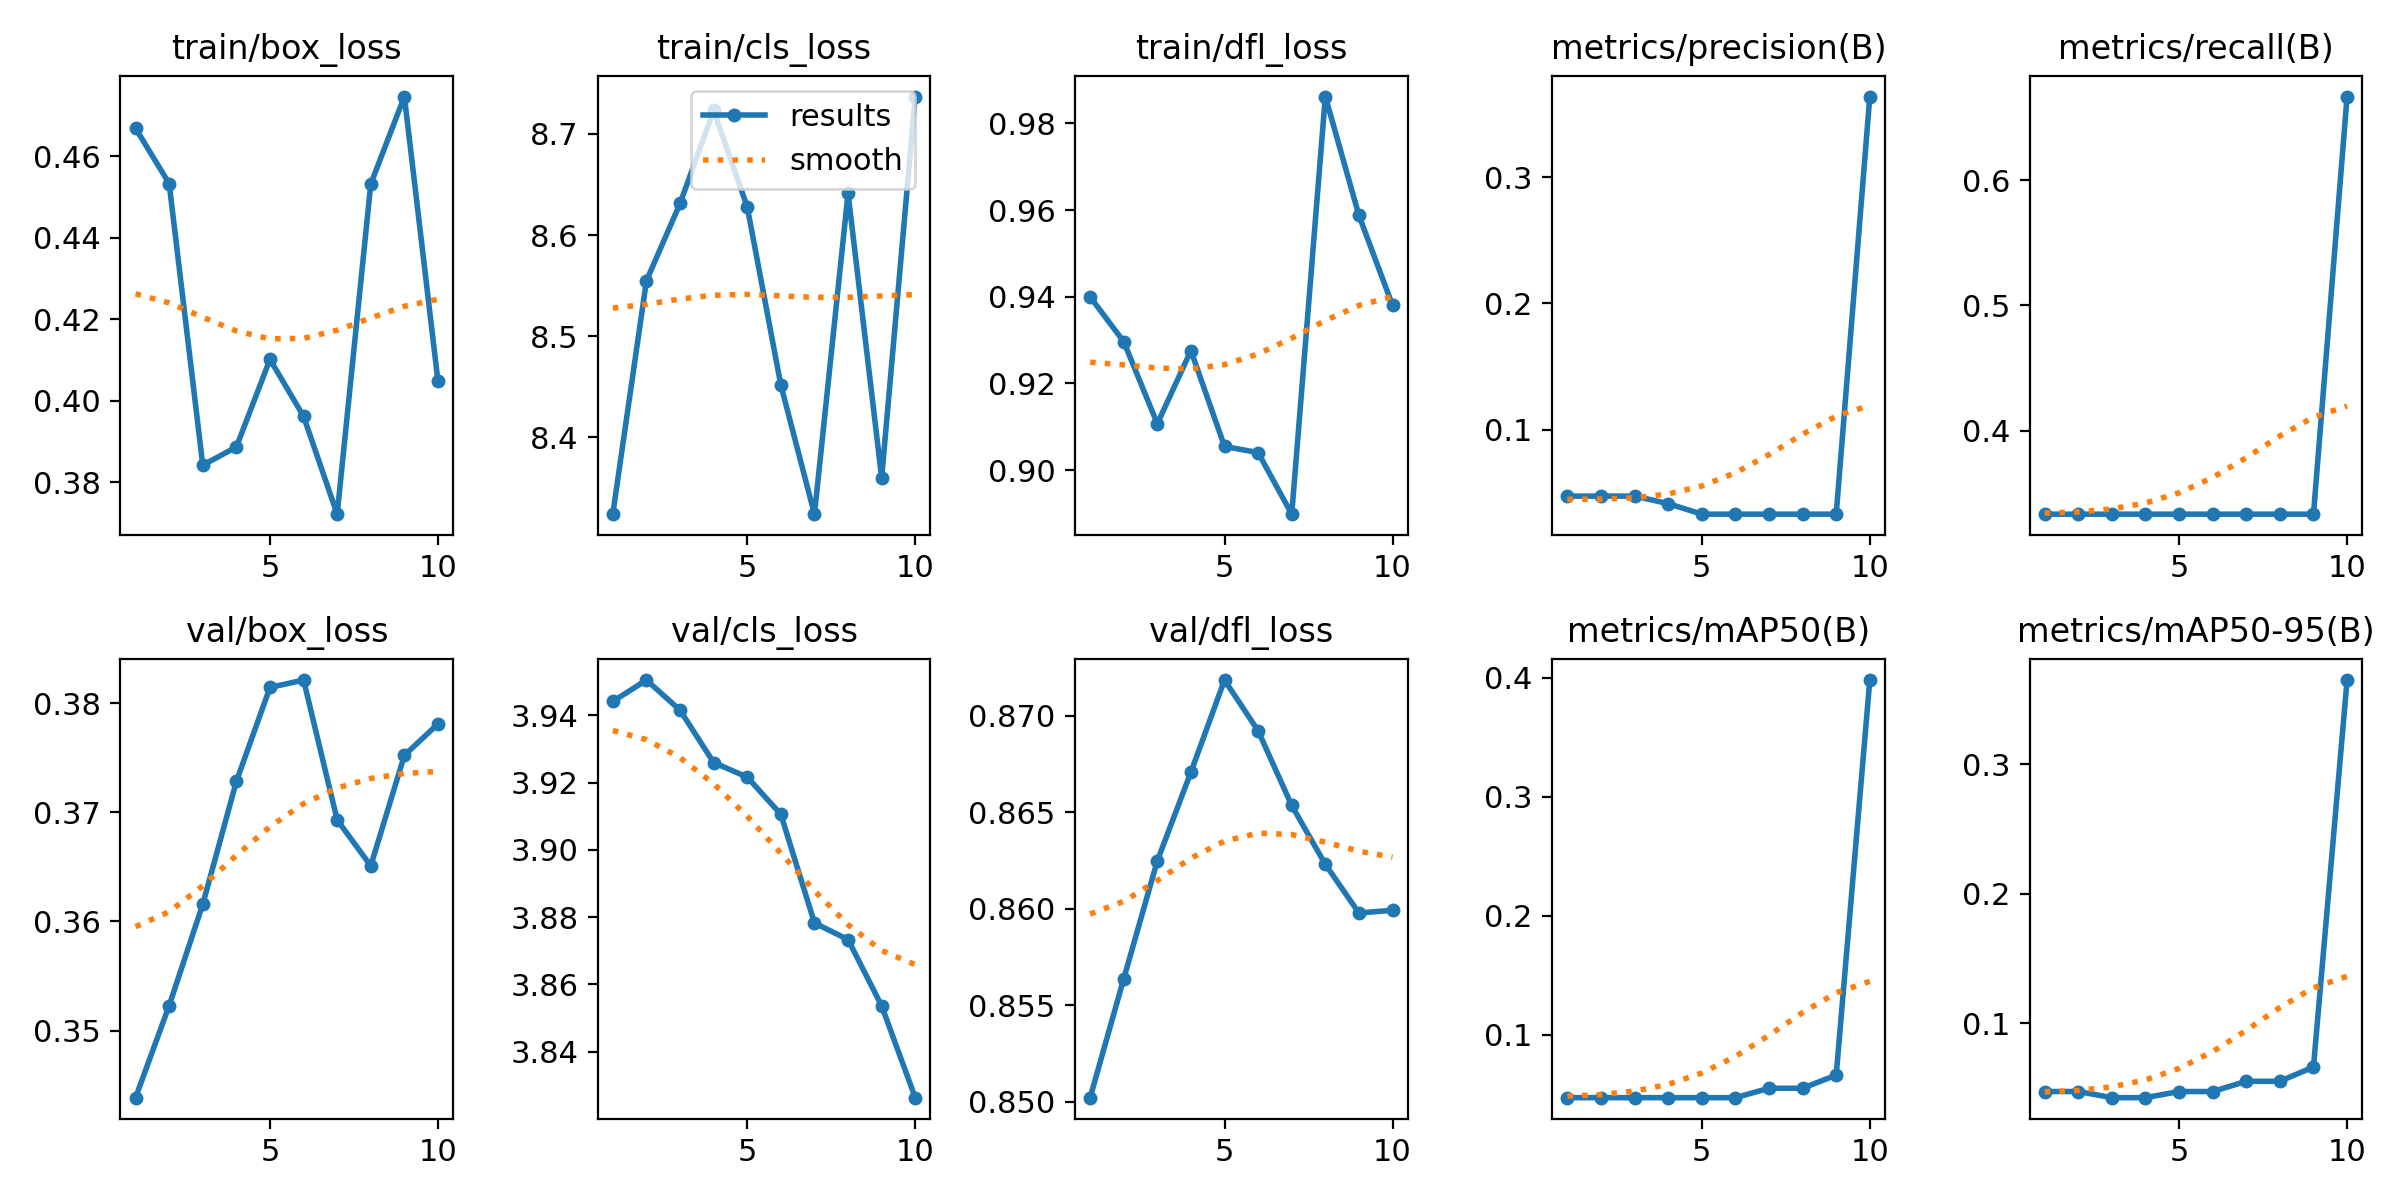


🎯 검증 세트 예측 결과:


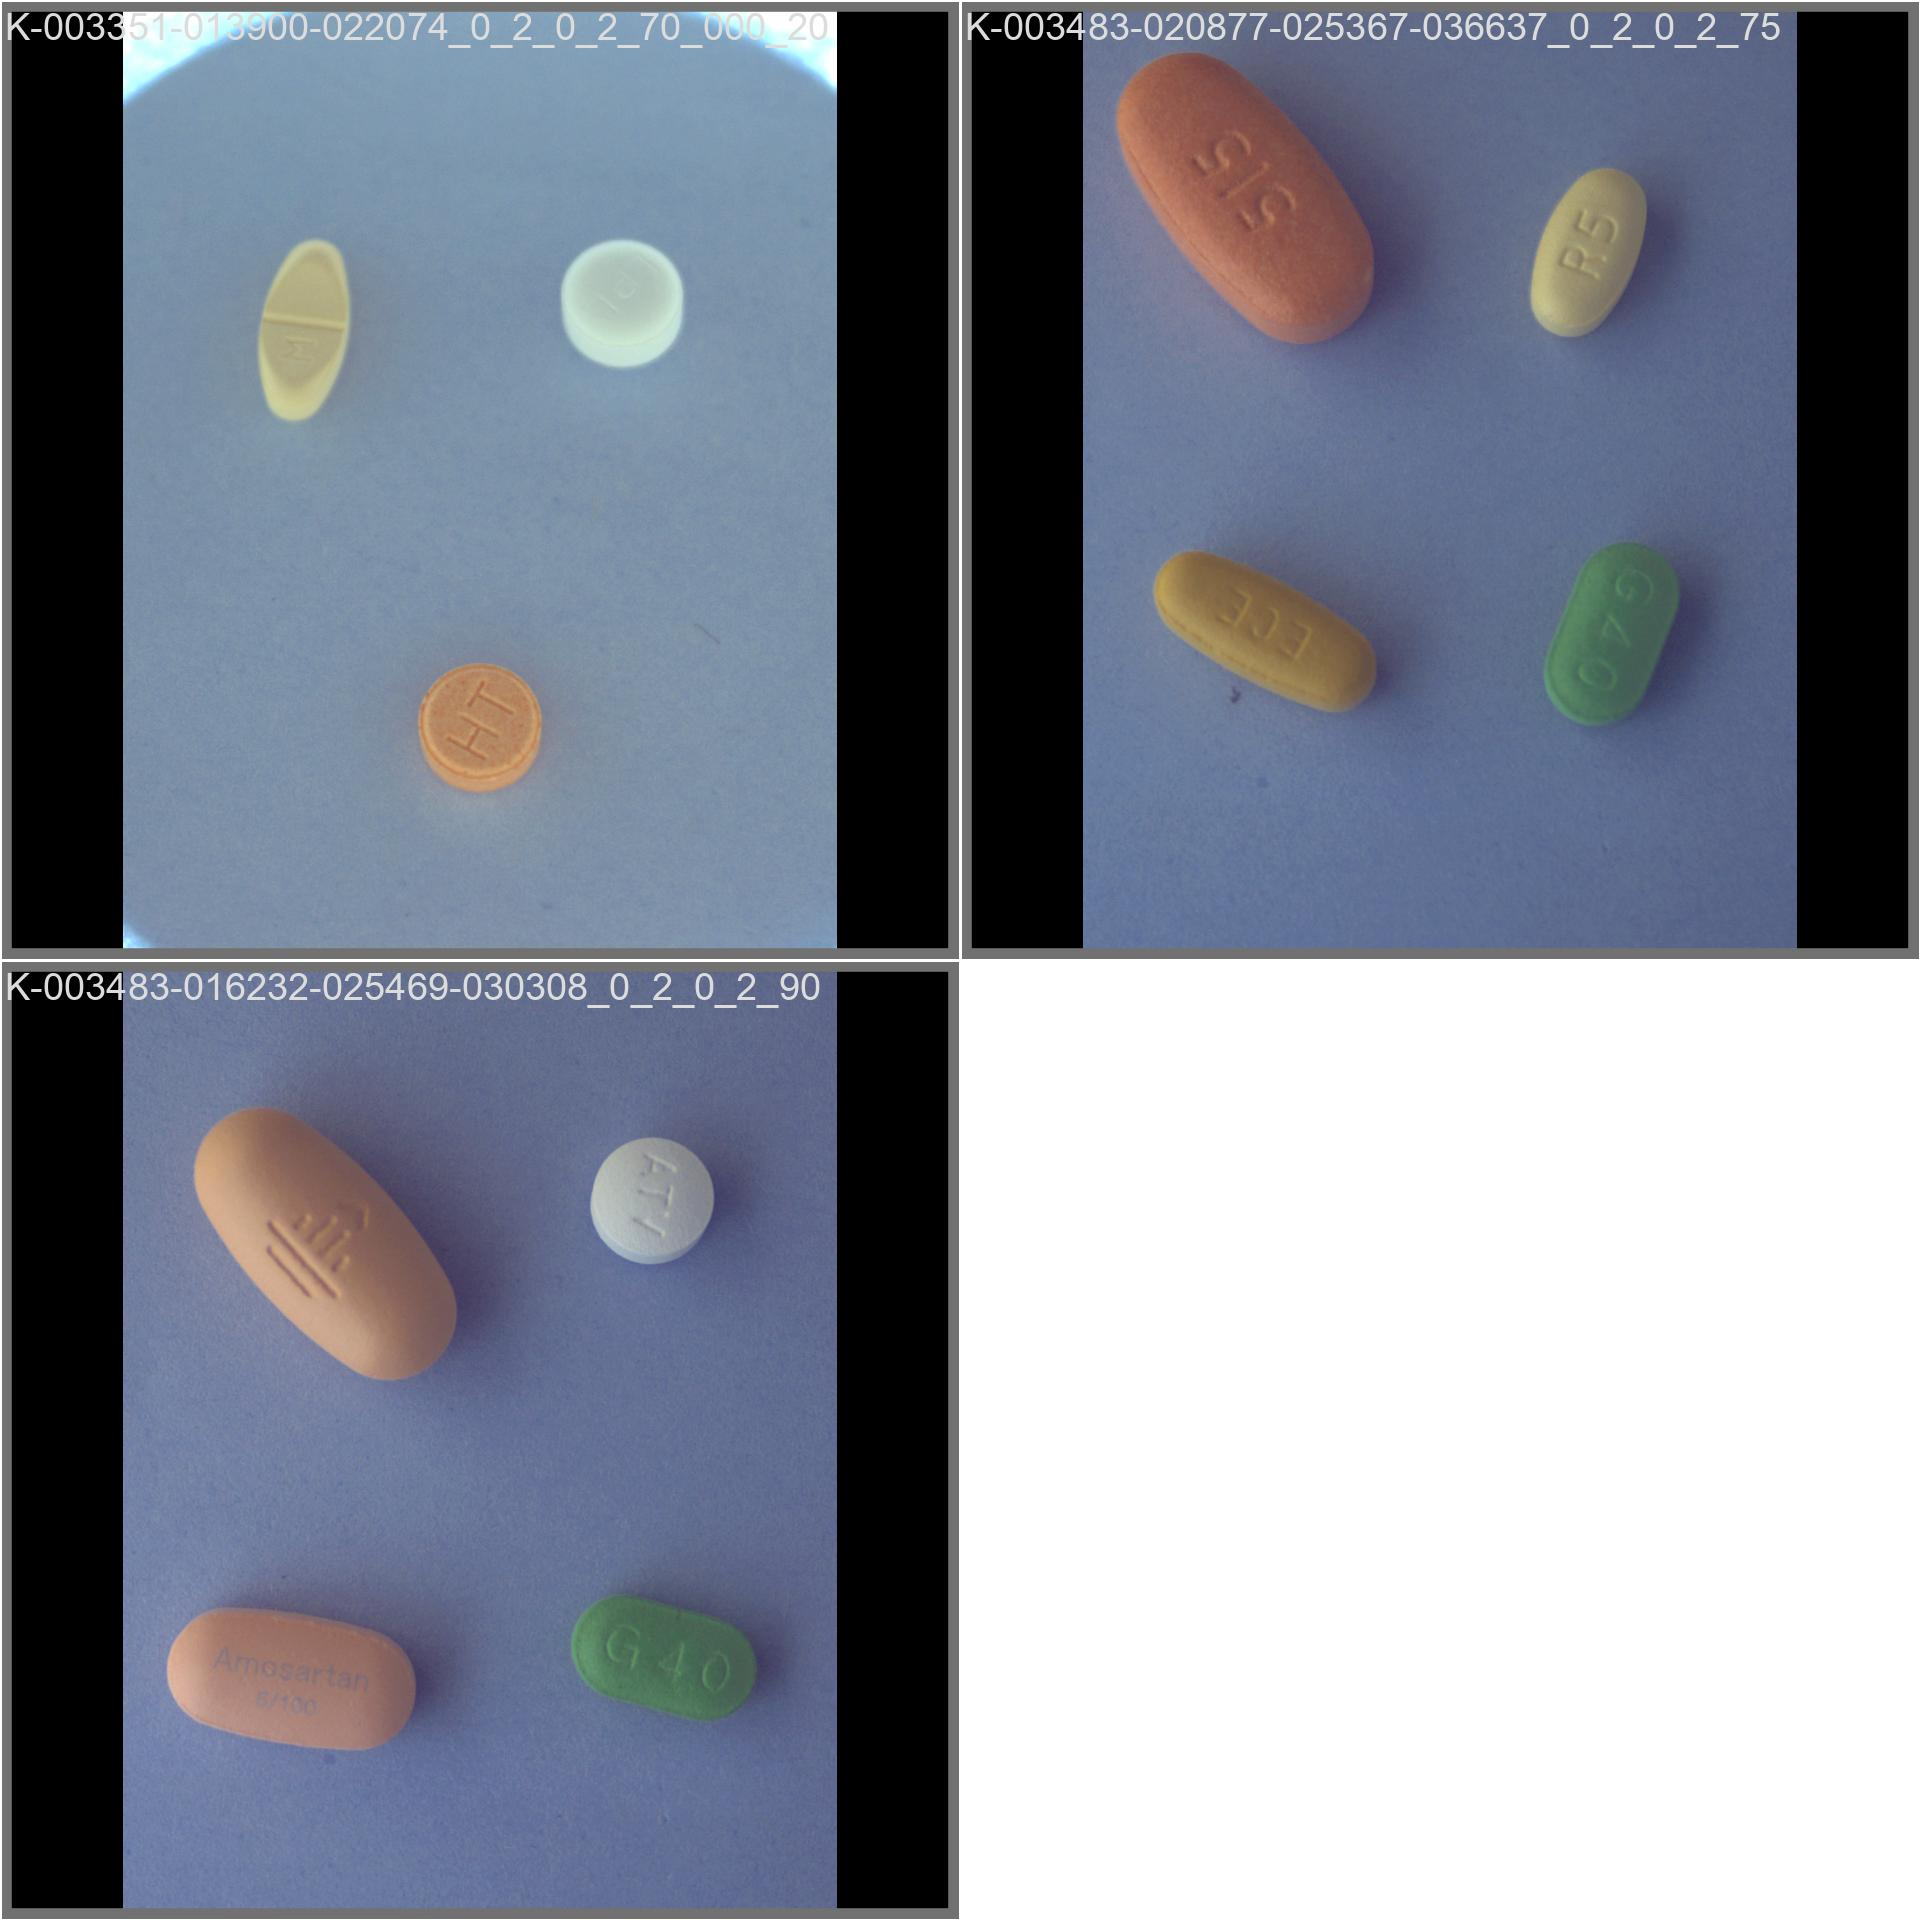


📈 혼동 행렬:


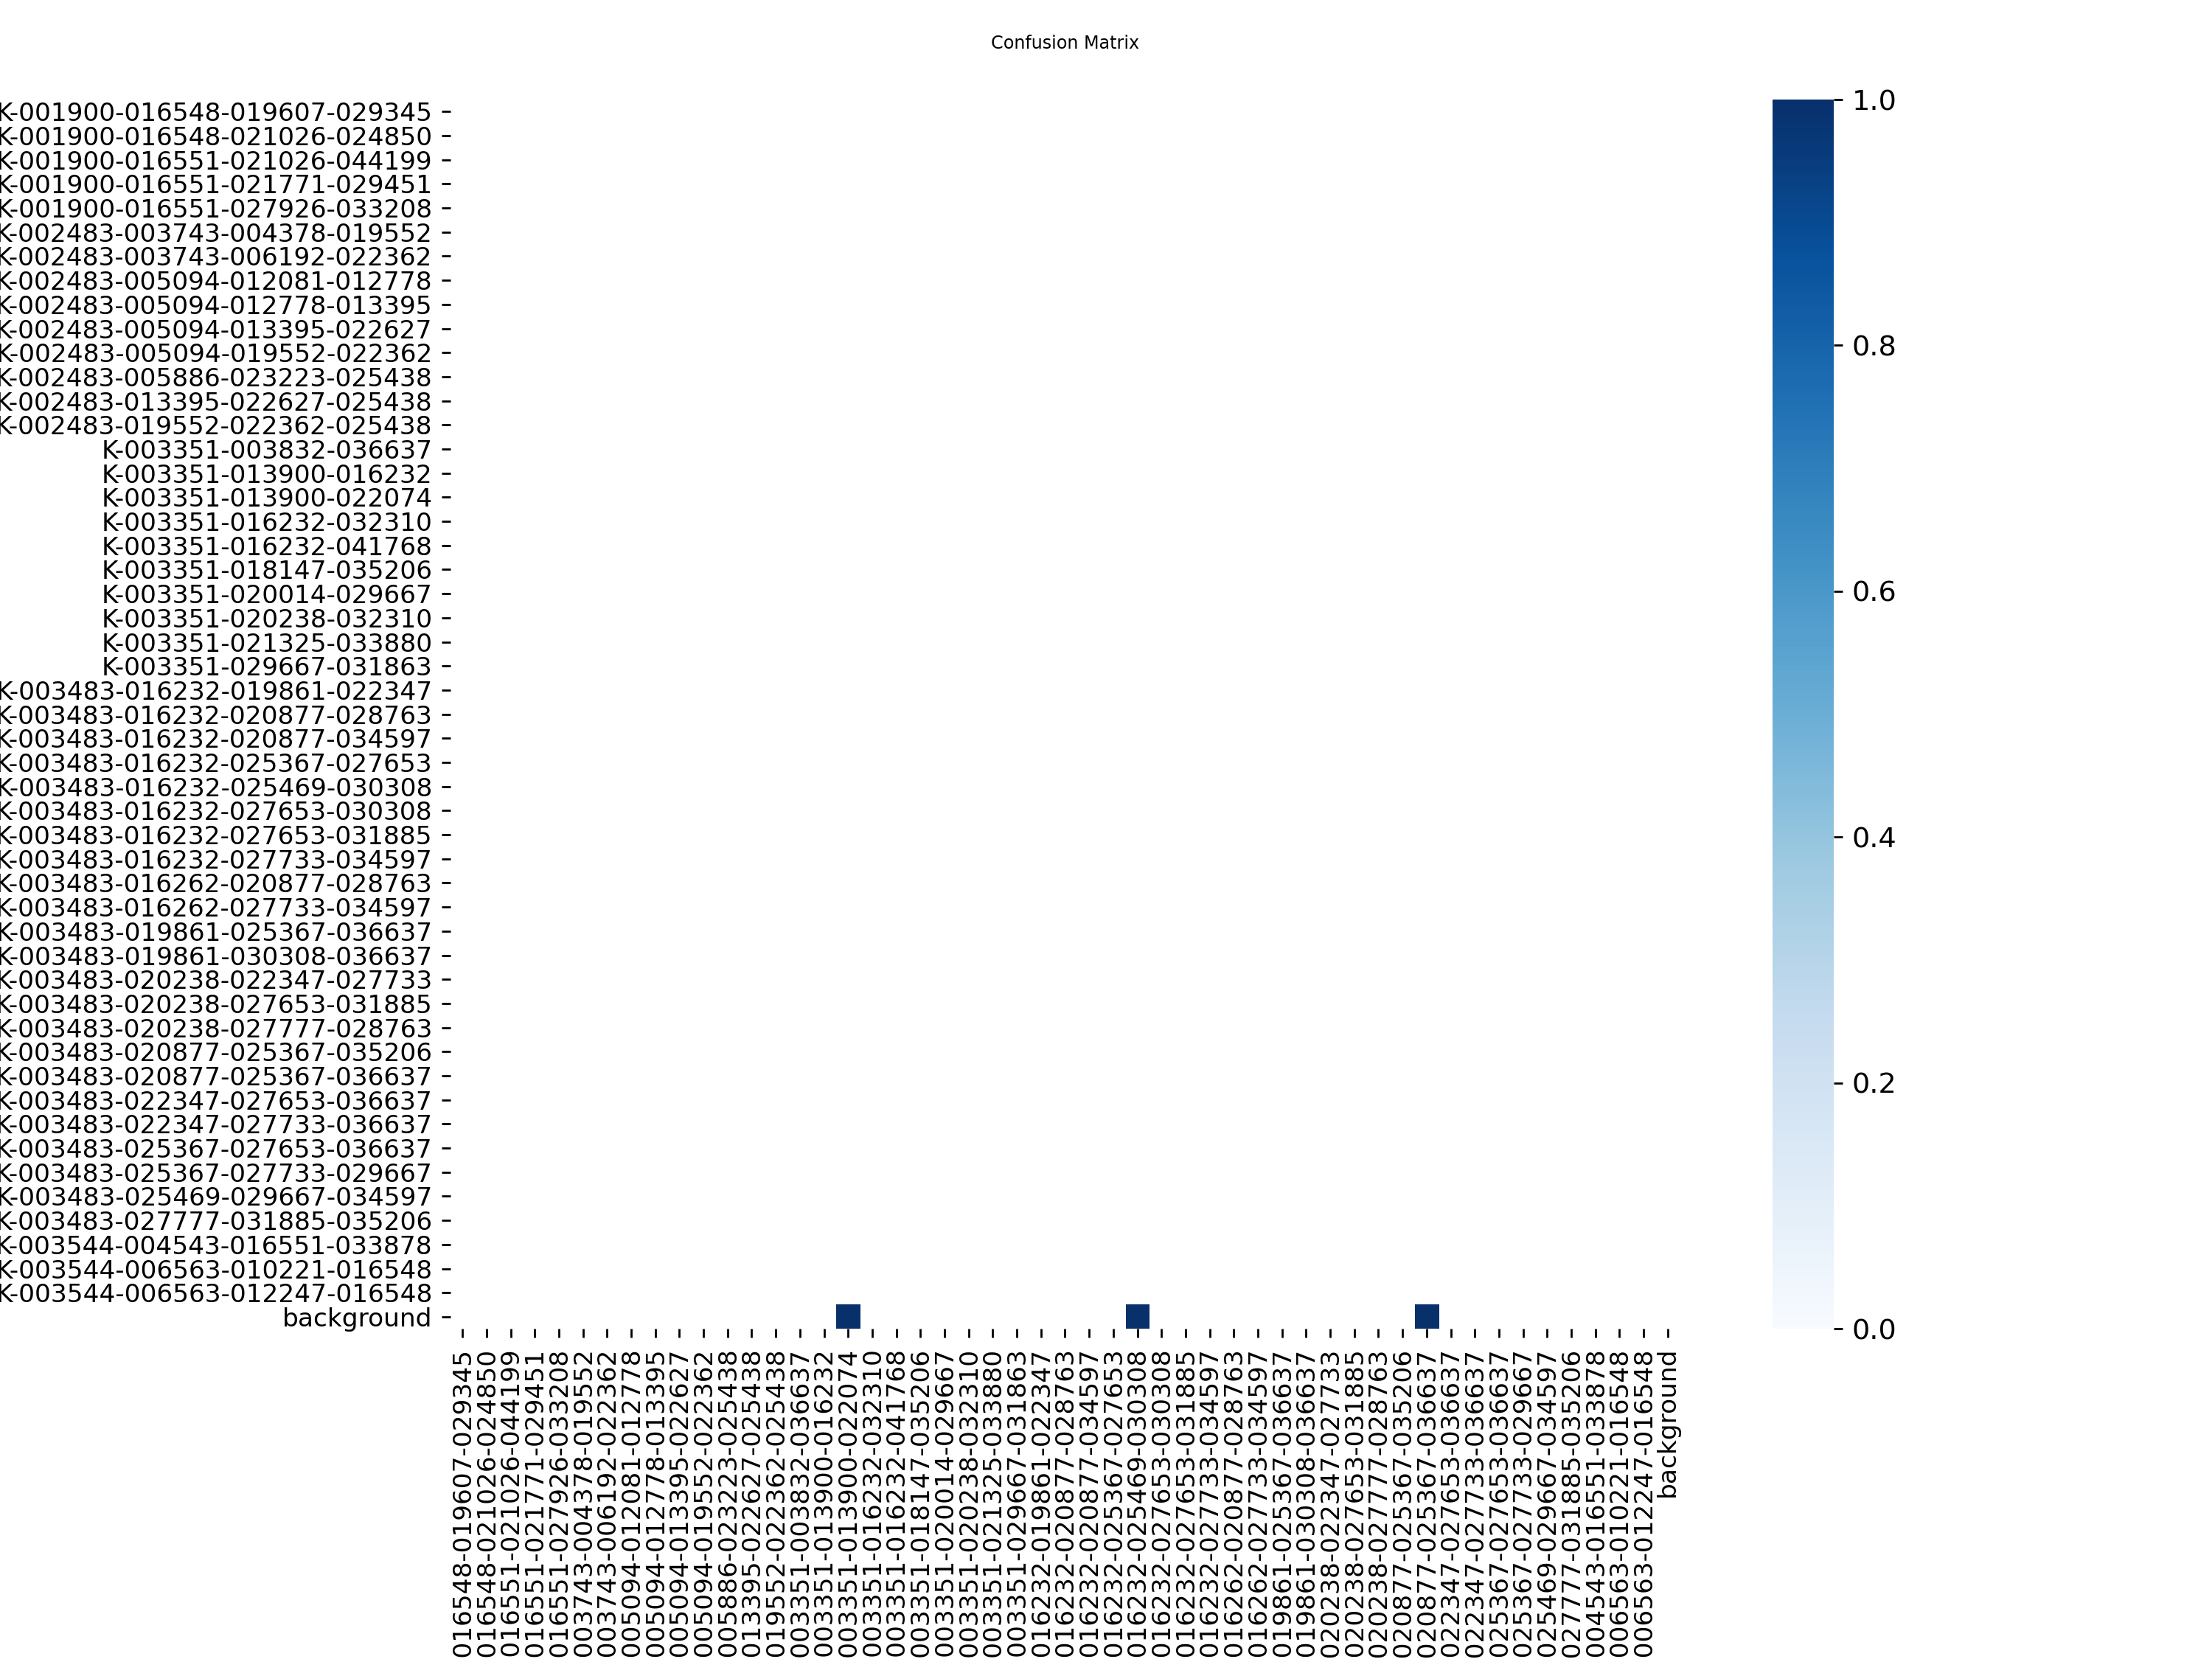

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image, display

# 학습 곡선 이미지 표시
if 'latest_folder' in locals():
    # 학습 곡선 그래프
    results_png = os.path.join(latest_folder, 'results.png')
    if os.path.exists(results_png):
        print("📊 학습 곡선:")
        display(Image(results_png))

    # 예측 결과 샘플
    val_batch_png = glob.glob(os.path.join(latest_folder, 'val_batch*.jpg'))
    if val_batch_png:
        print("\n🎯 검증 세트 예측 결과:")
        display(Image(val_batch_png[0]))

    # 혼동 행렬
    confusion_matrix = os.path.join(latest_folder, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix):
        print("\n📈 혼동 행렬:")
        display(Image(confusion_matrix))

## 9. 간단한 추론 테스트

테스트 이미지: ./data/prototype_data/final_dataset/images/test/K-001900-016548-021026-024850_0_2_0_2_70_000_200.png

image 1/1 /content/drive/MyDrive/Codeit_AI_4th_Drug_image_CV_project/data/prototype_data/final_dataset/images/test/K-001900-016548-021026-024850_0_2_0_2_70_000_200.png: 1280x1280 (no detections), 20.0ms
Speed: 6.9ms preprocess, 20.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1280, 1280)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


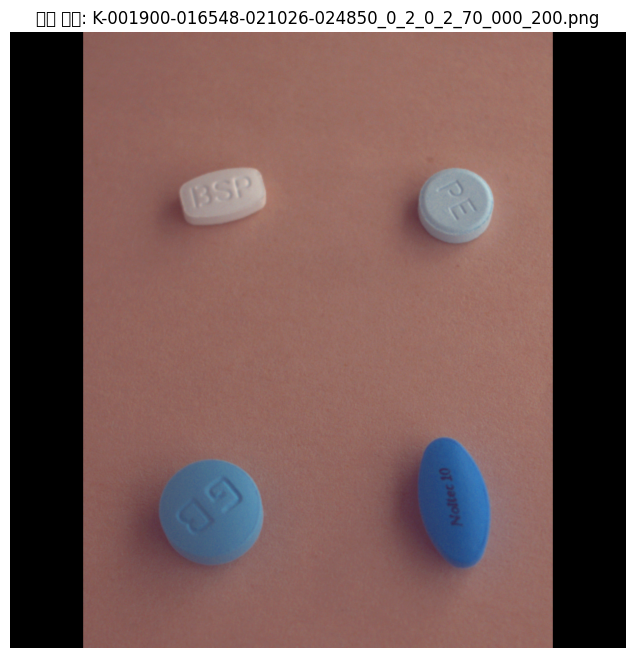


탐지된 객체 수: 0


In [ ]:
# 학습된 모델로 추론 테스트
if 'best_model_path' in locals() and os.path.exists(best_model_path):
    # 학습된 모델 로드
    trained_model = YOLO(best_model_path)

    # 테스트 이미지에서 하나 선택
    test_images_path = os.path.join(dataset_path, 'images/test')
    test_images = [f for f in os.listdir(test_images_path) if f.endswith('.png')]

    if test_images:
        test_image = os.path.join(test_images_path, test_images[0])
        print(f"테스트 이미지: {test_image}")

        # 추론 실행
        results = trained_model(test_image)

        # 결과 저장 및 표시
        result_image = results[0].plot()

        # 결과 이미지 표시
        plt.figure(figsize=(12, 8))
        plt.imshow(result_image)
        plt.axis('off')
        plt.title(f'추론 결과: {os.path.basename(test_image)}')
        plt.show()

        # 탐지된 객체 정보
        boxes = results[0].boxes
        if boxes is not None:
            print(f"\n탐지된 객체 수: {len(boxes)}")
            for i, box in enumerate(boxes):
                conf = box.conf[0].item()
                cls = int(box.cls[0].item())
                class_name = dataset_config['names'][cls]
                print(f"  객체 {i+1}: {class_name} (신뢰도: {conf:.3f})")
        else:
            print("탐지된 객체가 없습니다.")
    else:
        print("테스트 이미지를 찾을 수 없습니다.")

## 10. 성능 평가

In [ ]:
# 전체 테스트 세트에 대한 성능 평가
if 'trained_model' in locals():
    print("📊 테스트 세트 성능 평가 중...")

    # 테스트 세트 평가
    test_results = trained_model.val(
        data=yaml_path,
        split='test',  # 테스트 세트 사용
        save_json=True
    )

    print(f"테스트 세트 성능:")
    print(f"  mAP50: {test_results.box.map50:.3f}")
    print(f"  mAP50-95: {test_results.box.map:.3f}")
    print(f"  정밀도: {test_results.box.mp:.3f}")
    print(f"  재현율: {test_results.box.mr:.3f}")

    print(f"\n🎉 YOLO 모델 학습 및 테스트 완료!")
    print(f"모델 파일: {best_model_path}")

📊 테스트 세트 성능 평가 중...
Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 10.1±1.6 MB/s, size: 1581.1 KB)
val: Scanning /content/drive/MyDrive/Codeit_AI_4th_Drug_image_CV_project/data/prototype_data/final_dataset/labels/test... 8 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 8/8 22.1it/s 0.4s
val: New cache created: /content/drive/MyDrive/Codeit_AI_4th_Drug_image_CV_project/data/prototype_data/final_dataset/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.8it/s 1.2s
                   all          8          8     0.0491      0.375     0.0802     0.0763
K-001900-016548-021026-024850          1          1          0          0          0          0
K-002483-005094-012778-013395          1          1          0          0          0          0
K-002483-013395-022627-025438          1          1      0.143          1      0

## 깃허브 업로드용 코드

In [ ]:
# 전역 설정 (권장) - 이 Colab 세션에서 계속 사용
!git config --global user.name "Dongjin-1203"
!git config --global user.email "hambur1203@gmail.com"

In [ ]:
!git add .

In [ ]:
!git commit -m "파이프라인 테스트용 모델 파일 테스트 완료(YOLOv8)"

[main 785c88a] 파이프라인 테스트용 모델 파일 테스트 완료(YOLOv8)
 63 files changed, 353 insertions(+), 1 deletion(-)
 rewrite model/notebooks/ETL_test_YOLOv8.ipynb (65%)
 create mode 100644 result/train/pill_detection/BoxF1_curve.png
 create mode 100644 result/train/pill_detection/BoxPR_curve.png
 create mode 100644 result/train/pill_detection/BoxP_curve.png
 create mode 100644 result/train/pill_detection/BoxR_curve.png
 create mode 100644 result/train/pill_detection/args.yaml
 create mode 100644 result/train/pill_detection/confusion_matrix.png
 create mode 100644 result/train/pill_detection/confusion_matrix_normalized.png
 create mode 100644 result/train/pill_detection/labels.jpg
 create mode 100644 result/train/pill_detection/results.csv
 create mode 100644 result/train/pill_detection/results.png
 create mode 100644 result/train/pill_detection/train_batch0.jpg
 create mode 100644 result/train/pill_detection/train_batch1.jpg
 create mode 100644 result/train/pill_detection/train_batch2.jpg
 create mode 

In [ ]:
!git pull origin main

From https://github.com/Dongjin-1203/Codeit_AI_4th_Drug_image_CV_project
 * branch            main       -> FETCH_HEAD
Already up to date.


In [ ]:
!git push origin main

Enumerating objects: 64, done.
Counting objects: 100% (64/64), done.
Delta compression using up to 8 threads
Compressing objects: 100% (55/55), done.
Writing objects: 100% (60/60), 33.56 MiB | 13.21 MiB/s, done.
Total 60 (delta 11), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (11/11), completed with 1 local object.
To https://github.com/Dongjin-1203/Codeit_AI_4th_Drug_image_CV_project.git
   d127816..785c88a  main -> main
